# train several classification algorithms to predict churn rate of telecommunication customers
* 1- logistic Regression
* 2- support vector machine
* 3- Knn
* 4- Random forest classifer

# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [2]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly

     |████████████████████████████████| 81 kB 179 kB/s eta 0:00:01


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67922 sha256=b095eb40d0e061a6f4961cbd32bfba20099cebfa58057e4eceac6b8ea8c9e30b
  Stored in directory: /home/rahma/.cache/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [3]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript


In [4]:
# Read the CSV file 
df = pd.read_csv('telecom_churn.csv')

In [5]:
# Load the top 5 instances
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
# Load the bottom 5 instances 
df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [7]:
# Check the shape of the dataframe
df.shape

(5000, 21)

In [8]:
# Display the feature columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [9]:
# Obtain the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

- What is the maximum and average daily minutes?

In [11]:
df.agg({'total_day_minutes':['max', 'mean']})

,total_day_minutes
max,351.5000
mean,180.2889


# PERFORM DATA VISUALIZATION

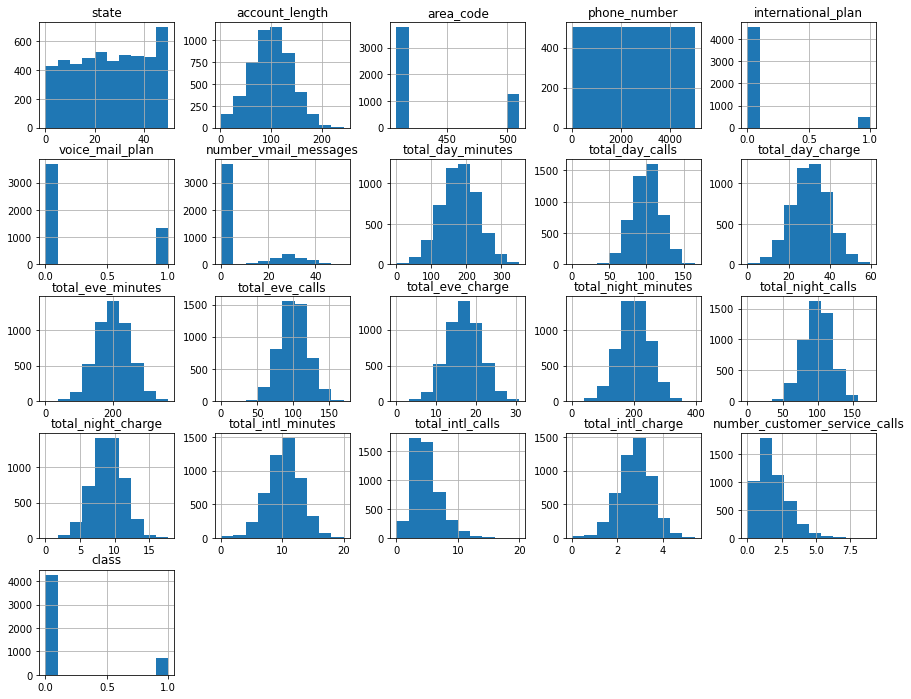

In [12]:
df.hist(figsize=(15,12));

In [13]:
df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [14]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram
import plotly.graph_objects as go

fig = go.Figure(data = [go.Pie(labels=['Retained (0)', 'Exited (1)'], values = df['class'].value_counts())])
fig.show()

In [15]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(df, x='international_plan', color='class')
fig.show()

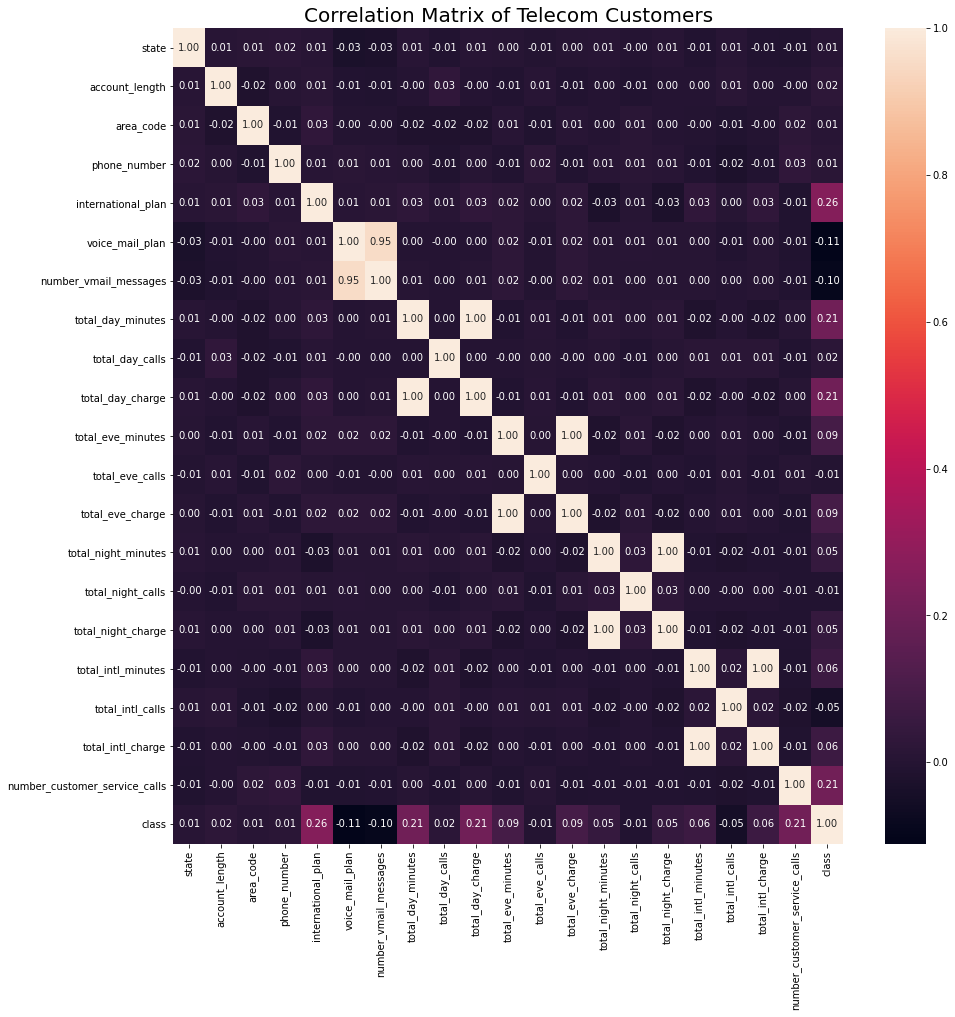

In [16]:
# Correlation Matrix

corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

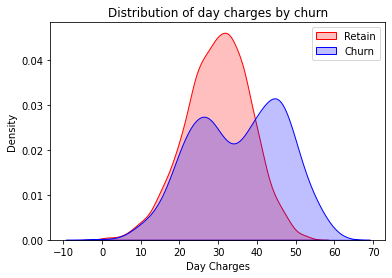

In [17]:
# Churn by day charges
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

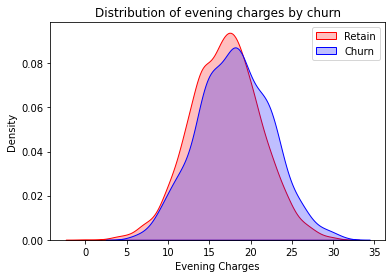

In [18]:
# Churn by evening charges
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

- Plot the plotly histogram on voice mail plan correlated with Churn feature

In [19]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [20]:
fig = px.histogram(df, x='voice_mail_plan', color='class')
fig.show()

# IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [21]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = df["class"]

In [22]:
X.shape

(5000, 18)

In [23]:
y.shape

(5000,)

In [24]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 18)
(4000,)
(1000, 18)
(1000,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

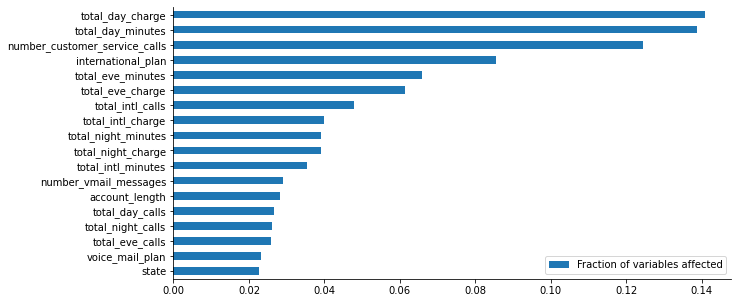

In [27]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [28]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression(max_iter=2000, class_weight='balanced')
model_LR.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

In [30]:
y_pred = model_LR.predict(X_test)

In [31]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       861
           1       0.35      0.78      0.49       139

    accuracy                           0.77      1000
   macro avg       0.66      0.78      0.67      1000
weighted avg       0.87      0.77      0.80      1000



<AxesSubplot:>

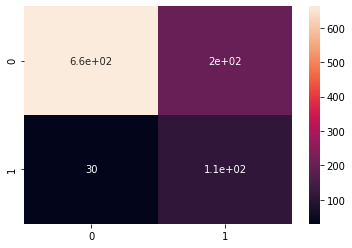

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

# TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [38]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter=10000, class_weight='balanced')
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

/home/rahma/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/rahma/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/rahma/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/rahma/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/rahma/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(class_weight='balanced',
                                                max_iter=10000))

In [39]:
y_predict = model_svm.predict(X_test)

<AxesSubplot:>

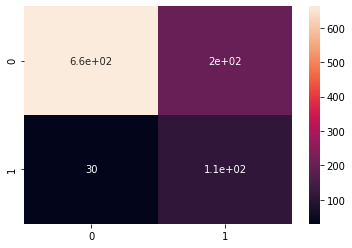

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       861
           1       0.35      0.78      0.49       139

    accuracy                           0.77      1000
   macro avg       0.66      0.78      0.67      1000
weighted avg       0.87      0.77      0.80      1000



# TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = model_rf.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       861
           1       0.92      0.76      0.83       139

    accuracy                           0.96      1000
   macro avg       0.94      0.88      0.91      1000
weighted avg       0.96      0.96      0.96      1000



<AxesSubplot:>

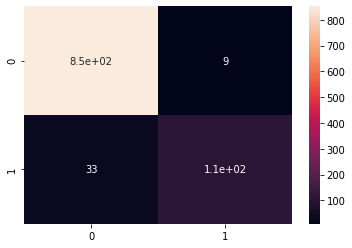

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model_knn= KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred= model_knn.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       861
           1       0.84      0.33      0.47       139

    accuracy                           0.90      1000
   macro avg       0.87      0.66      0.71      1000
weighted avg       0.89      0.90      0.88      1000



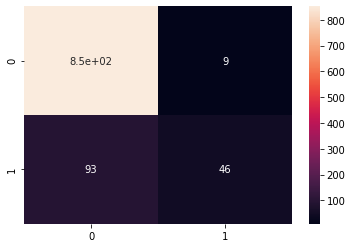

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

# TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [53]:
y_pred = model_NB.predict(X_test)

In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       861
           1       0.56      0.17      0.26       139

    accuracy                           0.87      1000
   macro avg       0.72      0.58      0.60      1000
weighted avg       0.84      0.87      0.83      1000



<AxesSubplot:>

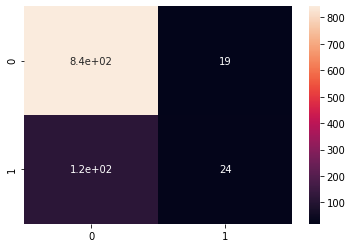

In [55]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

In [65]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_NB.predict_proba(X_test)[:, 1], pos_label = 1)


In [66]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_NB.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.8306804034124616
Support Vector Machine:  0.811144812373098
Random Forest:  0.9287343644248365
K-Nearest Neighbors:  0.6986188053041886
Naive Bayes:  0.8481270732542885


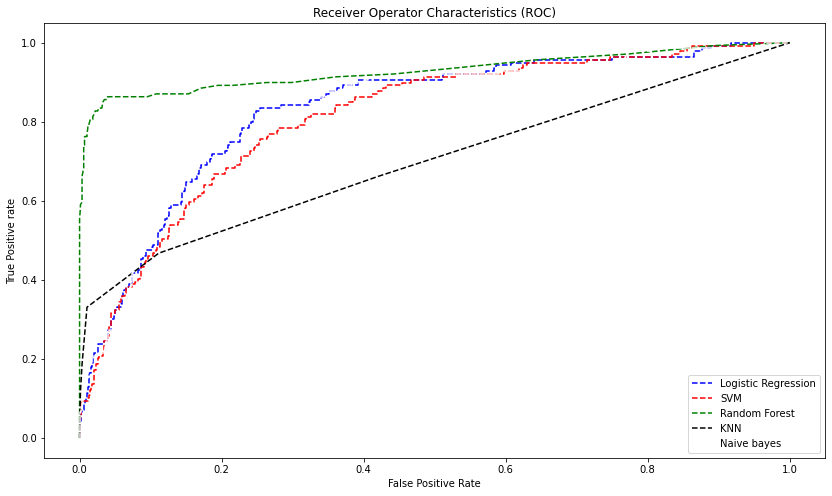

In [70]:
plt.figure(figsize=(14,8))
plt.plot(fpr1, tpr1, linestyle = "--", color = "Blue", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "black", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

# TASK #11: CONCLUSION & PROJECT RECAP

In [71]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       861
           1       0.92      0.76      0.83       139

    accuracy                           0.96      1000
   macro avg       0.94      0.88      0.91      1000
weighted avg       0.96      0.96      0.96      1000



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~92% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

* We can improve this model even more better by using "Grid Search" method.
